<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Basic_UQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Let's investigate uncertainty in predicting value of Pi using Monte Carlo

Estimating Pi (3.14159265358979323846264338327950288419716939937510)

In [1]:
import numpy as np

# Number of random points
n_points = 1000000

# Generate random points
x = np.random.uniform(0, 1, n_points)
y = np.random.uniform(0, 1, n_points)

# Check if points are inside the quarter circle
inside_circle = (x**2 + y**2) <= 1

# Estimate value of pi
pi_estimate = 4 * np.sum(inside_circle) / n_points
print(f"Estimated value of pi: {pi_estimate}")


Estimated value of pi: 3.143472


2. This example demonstrates how to use Monte Carlo simulation to propagate uncertainty through a simple mathematical function.

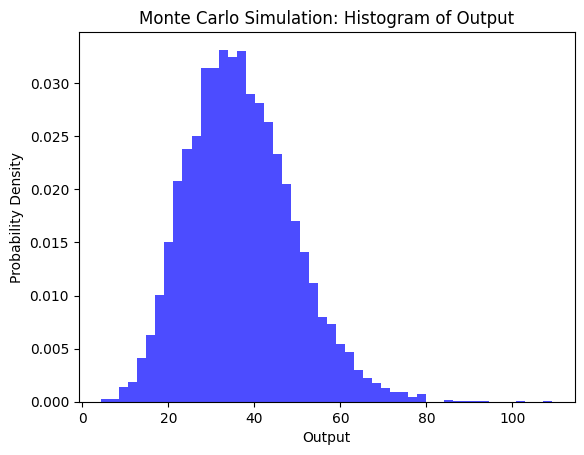

Mean of output: 36.90
Standard deviation of output: 12.12


In [2]:
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Define the function
def f(x):
    return x**2 + 2*x + 1

# Number of samples
N = 10000

# Generate random samples for input variable x (assuming normal distribution)
mean_x = 5
std_x = 1
x_samples = np.random.normal(mean_x, std_x, N)

# Compute the output for each sample
y_samples = f(x_samples)

# Plot the histogram of the output
plt.hist(y_samples, bins=50, density=True, alpha=0.7, color='blue')
plt.title('Monte Carlo Simulation: Histogram of Output')
plt.xlabel('Output')
plt.ylabel('Probability Density')
plt.show()

# Calculate mean and standard deviation of the output
mean_y = np.mean(y_samples)
std_y = np.std(y_samples)
print(f'Mean of output: {mean_y:.2f}')
print(f'Standard deviation of output: {std_y:.2f}')


3. Suppose an engineer wants to estimate the reliability of a mechanical component subject to random loads and material strength.

In [ ]:
import numpy as np

# Define parameters
n_simulations = 10000
mean_load = 500
std_load = 50
mean_strength = 600
std_strength = 50

# Generate random samples
load_samples = np.random.normal(mean_load, std_load, n_simulations)
strength_samples = np.random.normal(mean_strength, std_strength, n_simulations)

# Determine failure
failures = load_samples > strength_samples

# Estimate probability of failure
probability_of_failure = np.mean(failures)
print(f"Estimated Probability of Failure: {probability_of_failure:.2f}")


Estimated Probability of Failure: 0.07


In [3]:
!pip install -q pyDOE

  Preparing metadata (setup.py) ... done


4. Latin Hypercube Sampling
Description: This example demonstrates how to use Latin Hypercube Sampling (LHS) to generate samples for UQ.

In [4]:
#Generating 4 samples for two input variables \( X_1 \) and \( X_2 \) uniformly distributed between 0 and 1.
import numpy as np
from pyDOE import lhs

# Number of samples
n_samples = 4

# Generate LHS samples
lhs_samples = lhs(2, samples=n_samples)

# Scale samples to desired range [0, 1]
lhs_samples_scaled = lhs_samples * (1 - 0) + 0

print("LHS Samples:")
print(lhs_samples_scaled)


LHS Samples:
[[0.24406955 0.12474267]
 [0.93714431 0.55290151]
 [0.43227837 0.81390031]
 [0.71200331 0.46465837]]


5.

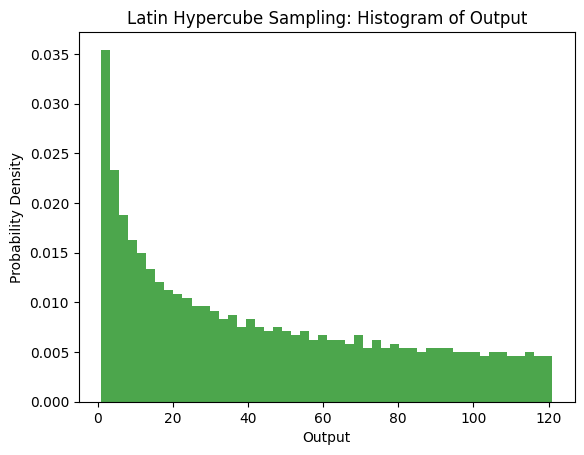

Mean of output: 44.33
Standard deviation of output: 35.44


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pyDOE import lhs

# Define the function
def f(x):
    return x**2 + 2*x + 1

# Number of samples
N = 1000

# Generate Latin Hypercube samples for input variable x
lhs_samples = lhs(1, samples=N)
x_samples = 10 * lhs_samples[:, 0]  # Scale to desired range [0, 10]

# Compute the output for each sample
y_samples = f(x_samples)

# Plot the histogram of the output
plt.hist(y_samples, bins=50, density=True, alpha=0.7, color='green')
plt.title('Latin Hypercube Sampling: Histogram of Output')
plt.xlabel('Output')
plt.ylabel('Probability Density')
plt.show()

# Calculate mean and standard deviation of the output
mean_y = np.mean(y_samples)
std_y = np.std(y_samples)
print(f'Mean of output: {mean_y:.2f}')
print(f'Standard deviation of output: {std_y:.2f}')


 6. Polynomial Chaos Expansion: Modeling the relationship between load and displacement in a mechanical system with uncertain parameters.

In [6]:
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Define parameters
n_samples = 1000
mean_load, std_load = 500, 50
mean_strength, std_strength = 600, 50

# Generate random samples
L_samples = np.random.normal(mean_load, std_load, n_samples)
S_samples = np.random.normal(mean_strength, std_strength, n_samples)
failure_samples = (L_samples > S_samples).astype(int)

# Create polynomial features
poly = PolynomialFeatures(degree=3)
X = np.vstack((L_samples, S_samples)).T
X_poly = poly.fit_transform(X)

# Fit PCE model using linear regression
model = LinearRegression()
model.fit(X_poly, failure_samples)
coefficients = model.coef_

# Function to evaluate PCE model
def evaluate_pce(L, S, model, poly):
    X = np.vstack((L, S)).T
    X_poly = poly.transform(X)
    return model.predict(X_poly)

# Evaluate PCE model on new samples
new_L_samples = np.random.normal(mean_load, std_load, n_samples)
new_S_samples = np.random.normal(mean_strength, std_strength, n_samples)
predicted_failures = evaluate_pce(new_L_samples, new_S_samples, model, poly)

# Estimate probability of failure
probability_of_failure = np.mean(predicted_failures)
print(f"Estimated Probability of Failure: {probability_of_failure:.2f}")


Estimated Probability of Failure: 0.07


In [11]:
 pip install bayesian-optimization

7.  This example demonstrates how to use Bayesian optimization for finding the minimum of a function.

|   iter    |  target   |     x     |
-------------------------------------
| 1         | -0.7086   | 0.834     |
| 2         | -0.1423   | 1.441     |
| 3         | -0.1391   | 1.438     |
| 4         | 0.0       | 0.0       |
| 5         | -0.5841   | 0.2576    |
| 6         | -2.321    | 2.0       |
| 7         | -0.2313   | 1.137     |
| 8         | -0.1006   | 1.277     |
| 9         | -0.1193   | 0.05099   |
| 10        | -0.1193   | 0.05099   |
| 11        | -0.1193   | 0.05099   |
| 12        | -0.1193   | 0.05099   |


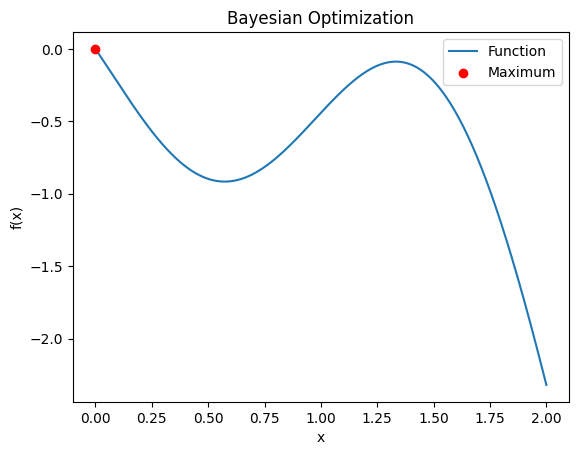

Optimal value: x = 0.00, f(x) = 0.00


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization

# Define the function to minimize
def f(x):
    return -np.sin(3*x) - x**2 + 0.7*x

# Define the bounds of the search space
pbounds = {'x': (0, 2)}

# Initialize the optimizer
optimizer = BayesianOptimization(f=f, pbounds=pbounds, verbose=2, random_state=1)

# Perform the optimization
optimizer.maximize(init_points=2, n_iter=10)

# Extract the results
x = np.linspace(0, 2, 1000)
y = f(x)
max_x = optimizer.max['params']['x']
max_y = f(max_x)

# Plot the results
plt.plot(x, y, label='Function')
plt.scatter([max_x], [max_y], color='red', zorder=5, label='Maximum')
plt.title('Bayesian Optimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

print(f'Optimal value: x = {max_x:.2f}, f(x) = {max_y:.2f}')


8. GPR: Suppose we want to model the relationship between the load applied to a mechanical system and its resulting displacement, given a set of noisy measurements.

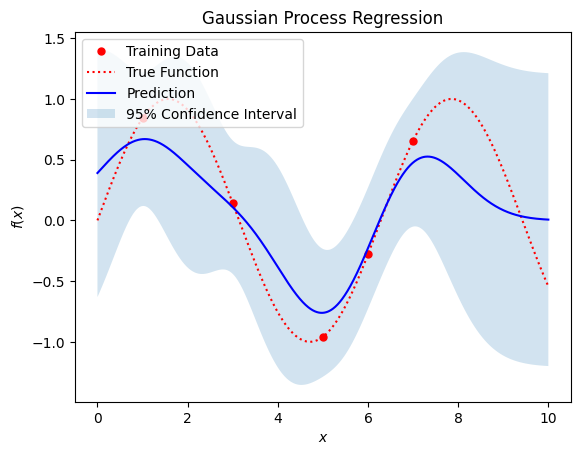

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Define the function
def f(x):
    return np.sin(x)

# Training data
x_train = np.array([[1], [3], [5], [6], [7]])
y_train = f(x_train)

# Create Gaussian Process model
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1)

# Fit to the training data
gp.fit(x_train, y_train)

# Prediction
x_pred = np.linspace(0, 10, 1000).reshape(-1, 1)
y_pred, sigma = gp.predict(x_pred, return_std=True)

# Plot the results
plt.figure()
plt.plot(x_train, y_train, 'r.', markersize=10, label='Training Data')
plt.plot(x_pred, f(x_pred), 'r:', label='True Function')
plt.plot(x_pred, y_pred, 'b-', label='Prediction')
plt.fill_between(x_pred.ravel(), y_pred.ravel() - 1.96 * sigma, y_pred.ravel() + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='upper left')
plt.title('Gaussian Process Regression')
plt.show()


9. Prediction Intervals: https://developer.ibm.com/articles/prediction-intervals-explained-a-lightgbm-tutorial/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 0.665000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start traini

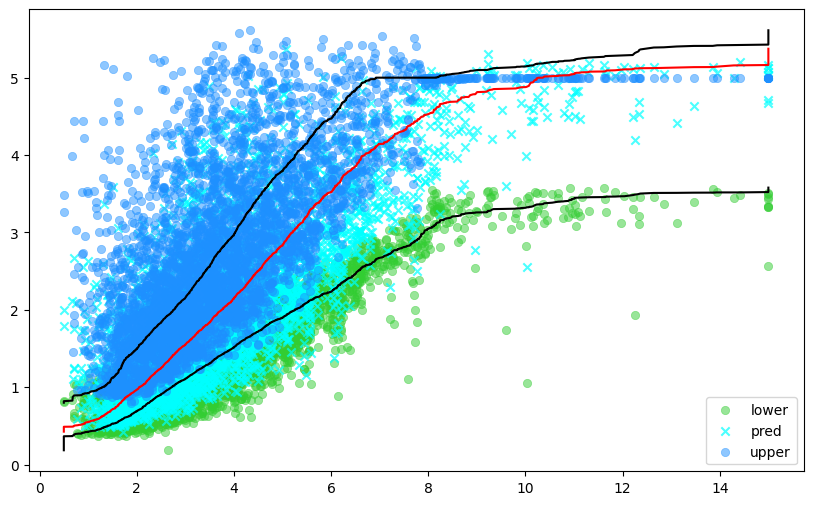

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
%matplotlib inline
import matplotlib.pyplot as plt
def sklearn_to_df(data_loader):
    X_data = data_loader.data
    X_columns = data_loader.feature_names
    x = pd.DataFrame(X_data, columns=X_columns)

    y_data = data_loader.target
    y = pd.Series(y_data, name='target')

    return x, y
x, y = sklearn_to_df(fetch_california_housing())

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
#from data_loader import x_train, x_test, y_train, y_test

regressor = lgb.LGBMRegressor()
regressor.fit(x_train, y_train)
regressor_pred = regressor.predict(x_test)

lower = lgb.LGBMRegressor(objective = 'quantile', alpha = 1 - 0.95)
lower.fit(x_train, y_train)
lower_pred = lower.predict(x_test)


upper = lgb.LGBMRegressor(objective = 'quantile', alpha = 0.95)
upper.fit(x_train, y_train)
upper_pred = upper.predict(x_test)

score = r2_score(y_test, regressor_pred)
print('score',score)


plt.figure(figsize=(10, 6))

plt.scatter(x_test.MedInc, lower_pred, color='limegreen', marker='o', label='lower', lw=0.5, alpha=0.5)
plt.scatter(x_test.MedInc, regressor_pred, color='aqua', marker='x', label='pred', alpha=0.7)
plt.scatter(x_test.MedInc, upper_pred, color='dodgerblue', marker='o', label='upper', lw=0.5, alpha=0.5)
plt.plot(sorted(x_test.MedInc), sorted(lower_pred), color='black')
plt.plot(sorted(x_test.MedInc), sorted(regressor_pred), color='red')
plt.plot(sorted(x_test.MedInc), sorted(upper_pred), color='black')
plt.legend()

plt.show()

In [17]:
pip install uncertainty-toolbox

10. Uncertainty Metrics

In [18]:
import uncertainty_toolbox as uct

# Load an example dataset of 100 predictions, uncertainties, and ground truth values
predictions, predictions_std, y, x = uct.data.synthetic_sine_heteroscedastic(100)

# Compute all uncertainty metrics
metrics = uct.metrics.get_all_metrics(predictions, predictions_std, y)

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics
 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:02<00:00,  3.68it/s]


  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:05<00:00,  1.80it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.309
  RMSE          0.444
  MDAE          0.187
  MARPD         57.920
  R2            0.737
  Correlation   0.860
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.036
  Mean-absolute Calibration Error       0.031
  Miscalibration Area                   0.031
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.163
     Group Size: 0.56 -- Calibration Error: 0.066
     Group Size: 1.00 -- Calibration Error: 0.031
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.192
     Group Size: 0.56 -- Calibration Error: 0.080
     Group Size: 1.00 -- Calibration Error: 0.036
===============

Extras

In [7]:
!pip install -q chaospy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.0/254.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 12.5 MB/s eta 0:00:00


Example Sobol Sensitivity Analysis: This example demonstrates how to perform Sobol sensitivity analysis to determine the sensitivity of the output with respect to input variables.

In [9]:
pip install -q SALib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00


<ipython-input-10-2ecaa3ad2ac6>:19: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1000)
/usr/local/lib/python3.10/dist-packages/SALib/sample/saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


First-order indices: [ 0.17083529  0.62419573 -0.00323803  0.00170401]
Second-order indices: [[        nan -0.00519169 -0.0033711  -0.00125131]
 [        nan         nan  0.00406611  0.0014575 ]
 [        nan         nan         nan  0.21252934]
 [        nan         nan         nan         nan]]
Total-order indices: [0.16819911 0.62563663 0.20859542 0.20646136]


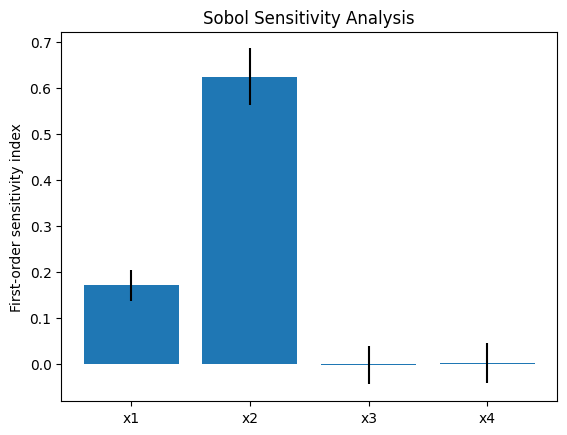

In [10]:
import numpy as np
import SALib
from SALib.sample import saltelli
from SALib.analyze import sobol
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x[:, 0]**2 + x[:, 1] + x[:, 2]*x[:, 3]

# Define the problem
problem = {
    'num_vars': 4,
    'names': ['x1', 'x2', 'x3', 'x4'],
    'bounds': [[-1, 1], [-1, 1], [-1, 1], [-1, 1]]
}

# Generate samples
param_values = saltelli.sample(problem, 1000)

# Evaluate the function
Y = f(param_values)

# Perform Sobol sensitivity analysis
Si = sobol.analyze(problem, Y)

# Print the first-order, second-order and total-order indices
print("First-order indices:", Si['S1'])
print("Second-order indices:", Si['S2'])
print("Total-order indices:", Si['ST'])

# Plot the results
fig, ax = plt.subplots()
ax.bar(problem['names'], Si['S1'], yerr=Si['S1_conf'])
ax.set_title('Sobol Sensitivity Analysis')
ax.set_ylabel('First-order sensitivity index')
plt.show()


Example 5: Bootstrapping
Description: This example demonstrates how to use bootstrapping to estimate the uncertainty in the mean of a dataset.

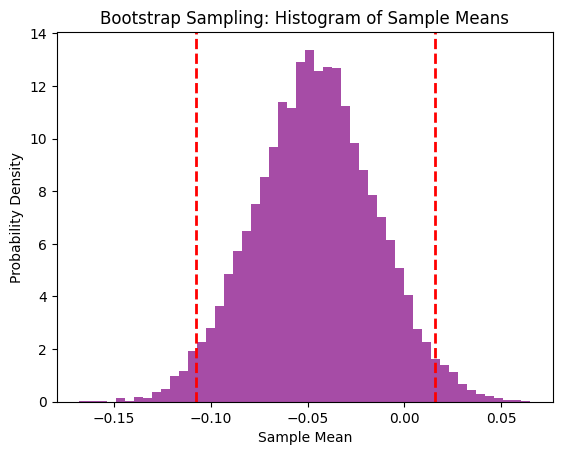

95% confidence interval for the mean: [-0.11, 0.02]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

# Number of bootstrap samples
B = 10000
bootstrap_means = np.zeros(B)

# Perform bootstrapping
for i in range(B):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Calculate confidence intervals
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

# Plot the results
plt.hist(bootstrap_means, bins=50, density=True, alpha=0.7, color='purple')
plt.axvline(ci_lower, color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci_upper, color='red', linestyle='dashed', linewidth=2)
plt.title('Bootstrap Sampling: Histogram of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Probability Density')
plt.show()

print(f'95% confidence interval for the mean: [{ci_lower:.2f}, {ci_upper:.2f}]')


Example 6: Bayesian Inference with MCMC
Description: This example demonstrates how to use Markov Chain Monte Carlo (MCMC) for Bayesian inference.

In [ ]:
pip install pymc3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.6/872.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of arviz to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
true_mean = 5
true_std = 2
data = np.random.normal(true_mean, true_std, 100)

# Define the model
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=10)
    likelihood = pm.Normal('y', mu=mu, sigma=sigma, observed=data)

    # Inference
    trace = pm.sample(2000, return_inferencedata=False)

# Plot the results
pm.plot_trace(trace)
plt.show()

# Summary of the posterior distribution
summary = pm.summary(trace)
print(summary)


RuntimeError: 
Could not import 'mkl'.  If you are using conda, update the numpy
packages to the latest build otherwise, set MKL_THREADING_LAYER=GNU in
your environment for MKL 2018.

If you have MKL 2017 install and are not in a conda environment you
can set the Theano flag blas__check_openmp to False.  Be warned that if
you set this flag and don't set the appropriate environment or make
sure you have the right version you *will* get wrong results.


Reliability Analysis using FORM
Description: This example demonstrates how to perform a First-Order Reliability Method (FORM) analysis.

In [ ]:
import numpy as np
from scipy.stats import norm

# Define the limit state function
def g(x):
    return 3 - x[0] - x[1]

# Mean and standard deviation of the input variables
mu = np.array([1.5, 1.5])
sigma = np.array([0.5, 0.5])

# Standardize the inputs
u = (mu - 0) / sigma

# Perform FORM analysis
beta = np.linalg.norm(u)
pf = norm.cdf(-beta)

print(f'Reliability index (beta): {beta:.2f}')
print(f'Probability of failure (pf): {pf:.5f}')


Reliability index (beta): 4.24
Probability of failure (pf): 0.00001


In [ ]:
pip install smt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.2/819.2 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 4.19.2
    Uninstalling jsonschema-4.19.2:
      Successfully uninstalled jsonschema-4.19.2


___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 10
   
___________________________________________________________________________
   
 Training
   
   Training ...


/usr/local/lib/python3.10/dist-packages/smt/surrogate_models/krg_based.py:968: UserWarning: R is too ill conditioned. Poor combination of regression model and observations.
  warnings.warn(


   Training - done. Time (sec):  0.5963030
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0006590
   
   Prediction time/pt. (sec) :  0.0000066
   


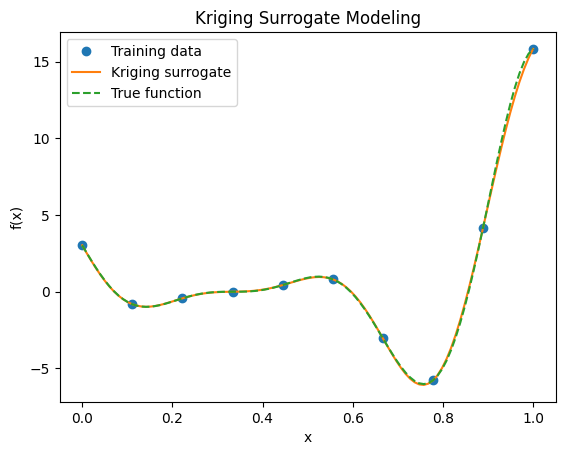

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from smt.surrogate_models import KRG

# Define the function
def f(x):
    return (6*x - 2)**2 * np.sin(12*x - 4)

# Training data
x_train = np.linspace(0, 1, 10).reshape(-1, 1)
y_train = f(x_train)

# Create Kriging surrogate model
kriging = KRG()
kriging.set_training_values(x_train, y_train)
kriging.train()

# Prediction
x_pred = np.linspace(0, 1, 100).reshape(-1, 1)
y_pred = kriging.predict_values(x_pred)

# Plot the results
plt.plot(x_train, y_train, 'o', label='Training data')
plt.plot(x_pred, y_pred, '-', label='Kriging surrogate')
plt.plot(x_pred, f(x_pred), '--', label='True function')
plt.title('Kriging Surrogate Modeling')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()
